In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import sem

%matplotlib inline
%config Completer.use_jedi = False


#import required sklearn for logistic regression classifier

import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix,roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold, RepeatedKFold, cross_validate
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold, SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the filtered isoform switch file and the file containing all genes for BRCA
#Only matched samples / files used

isoform_switch_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/isoform_switch/BRCA_FPKM_protein_isoform_filtered_matched.csv'
all_genes_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/GeneExpression_MAF/BRCA_FPKM_protein_all_matched.csv'

isoform_switch = pd.read_csv(isoform_switch_file,header=[0,1],sep='\t',index_col=[0])
all_genes = pd.read_csv(all_genes_file,header=[0,1],sep='\t',index_col=[0])


In [3]:
isoform_switch

Gene_symbol,TANK,RBCK1,CASC4,DUT,TMEM201,FBLN2,ABLIM3,MPRIP,MCF2L,EHBP1,...,ADAMTS12,PCGF5,REPS1,CCND3,LRRFIP2,ZRANB2,H2AFV,CEP104,SLK,Cancer
Gene_ensembl_id,ENSG00000136560,ENSG00000125826,ENSG00000166734,ENSG00000128951,ENSG00000188807,ENSG00000163520,ENSG00000173210,ENSG00000133030,ENSG00000126217,ENSG00000115504,...,ENSG00000151388,ENSG00000180628,ENSG00000135597,ENSG00000112576,ENSG00000093167,ENSG00000132485,ENSG00000105968,ENSG00000116198,ENSG00000065613,Cancer
TCGA-BH-A1FN,15.343920,16.896624,16.751647,9.053910,3.469054,18.969059,2.182001,6.682397,1.918617,7.225800,...,7.858756,4.875201,13.634318,9.727431,4.229633,25.029257,31.033869,6.468174,35.239420,1
TCGA-E9-A1NG,8.204818,15.724169,30.831324,9.540387,1.458159,41.826503,7.087709,9.316663,1.614837,7.243868,...,13.075343,7.006416,4.295827,10.860205,6.456335,11.036110,25.771819,5.205502,15.373430,1
TCGA-AC-A23H,10.839375,17.725220,17.908471,10.923948,2.476160,19.744676,5.266147,4.993341,1.905335,4.650695,...,8.015156,3.409479,4.394309,8.867406,5.226943,13.281163,34.015799,6.835127,11.712936,1
TCGA-A7-A0DC,10.536449,11.007388,24.786510,5.053322,2.507044,7.407384,4.796219,19.590190,7.059011,6.803514,...,6.755467,4.530175,11.314397,6.209923,16.712807,17.940940,25.324319,7.064833,21.742362,1
TCGA-BH-A0BA,6.762611,21.374576,14.355277,12.026462,1.573651,34.712848,6.110691,8.407031,2.751726,4.618470,...,3.782329,5.622924,4.904629,13.998974,5.872653,17.226376,40.761043,5.294808,20.291639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E9-A1N5,19.604428,19.962762,20.273215,12.540195,4.183457,27.180440,5.531773,15.044278,2.479386,8.448601,...,14.419136,9.162741,5.145388,11.837293,4.902132,20.365176,25.942621,5.686331,17.801280,0
TCGA-BH-A1FG,36.232750,9.888659,29.379022,24.273813,0.966405,10.883782,7.011272,5.691569,0.975409,8.065046,...,0.990118,13.375178,7.425772,11.752194,3.746268,32.822666,34.014328,3.046617,17.455299,0
TCGA-BH-A1EO,8.574873,14.496424,22.295529,15.524344,1.580722,177.982886,19.182326,10.441072,1.688305,13.969354,...,3.540979,7.320149,3.022848,12.044354,4.620927,12.120632,27.446018,4.062988,13.492229,0


In [4]:
#Check isoform_switch for and missing data

isoform_switch.isnull().sum().unique()

array([0])

In [5]:
#Check all genes file for missing data

all_genes.isnull().sum().sort_values(ascending = False)

#AFT7-NPFF is 'an important paralog of the gene AFT7' => could combine data for both??

Gene_symbol  Gene_ensembl_id
ATF7         ENSG00000267281    117
ATF7-NPFF    ENSG00000267281    112
A1BG         ENSG00000121410      0
PPP1R9A      ENSG00000158528      0
PPP2R1B      ENSG00000137713      0
                               ... 
GBP5         ENSG00000154451      0
GBP4         ENSG00000162654      0
GBP3         ENSG00000117226      0
GBP2         ENSG00000162645      0
ZZEF1        ENSG00000074755      0
Length: 19538, dtype: int64

In [6]:
#For now, will drop the missing data

all_genes.dropna(axis=1,inplace=True)

In [7]:
all_genes.isnull().sum().unique()

array([0])

In [8]:
all_genes

Gene_symbol,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
Gene_ensembl_id,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000184389,ENSG00000128274,ENSG00000118017,ENSG00000094914,ENSG00000081760,ENSG00000114771,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
TCGA-BH-A1FN,0.208011,0.009381,43.292960,0.055509,0.110075,3.581380,0.038150,5.007168,1.640055,0.000000,...,13.323137,4.351933,24.207158,1.127985,3.549771,7.245900,2.346176,12.914487,41.879917,3.253812
TCGA-E9-A1NG,0.108386,0.004110,178.373384,0.327900,0.000000,7.944528,0.022288,7.198746,2.232691,0.000000,...,6.468774,4.018591,7.967490,0.985287,2.102866,2.553868,0.058864,6.947852,67.347728,2.725455
TCGA-AC-A23H,0.020294,0.002822,37.866925,0.395196,0.000000,1.740345,0.007651,8.431803,6.124952,0.032494,...,8.147105,3.705314,20.387417,1.722966,7.227800,7.604626,0.825575,6.627812,70.866135,5.747454
TCGA-A7-A0DC,0.660110,0.131949,55.782077,0.746827,0.269265,1.928116,0.217754,9.173075,4.806061,1.023887,...,5.708031,2.624497,2.756902,2.866430,6.842064,14.519888,0.246469,6.343812,17.736301,17.258228
TCGA-BH-A0BA,0.146119,0.014777,123.459875,0.240457,0.000000,3.357131,0.040063,10.716496,23.238758,0.510444,...,9.728599,6.127255,20.796211,2.328833,5.314763,4.388074,1.277253,6.348272,45.638784,5.031597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E9-A1N5,0.123577,0.000000,218.502445,0.112979,0.096784,3.891323,0.149083,9.849961,6.297582,0.019786,...,10.611371,4.560166,14.725212,1.765314,3.393286,5.751026,0.344517,8.554784,68.433139,5.730586
TCGA-BH-A1FG,0.041596,0.000000,159.379363,0.098113,0.016289,1.619335,0.000000,4.526233,1.064364,0.000000,...,9.439939,2.975958,2.165248,2.337643,7.132933,2.126796,0.429540,9.423160,48.506383,1.833404
TCGA-BH-A1EO,0.007304,0.000000,318.847446,0.024039,0.009534,14.061376,0.110143,6.003210,1.774402,17.886628,...,6.842202,1.699611,2.079415,1.152451,2.119747,2.327924,0.016622,6.492188,53.802001,2.881474


In [9]:
#Check tumour weight / ratio ... since almost equal will not use 'class_weight' in model

tumour_ratio = sum(isoform_switch['Cancer','Cancer']==1) / sum(isoform_switch['Cancer','Cancer']==0)
tumour_ratio

1.0446428571428572

In [10]:
#Do an initial train test split to extract an 'unseen' test set of data (30%) for both isoform and all genes
#Set stratify as y to keep same ratio in test data

X_full_iso = isoform_switch.drop('Cancer',axis=1,level=0)
y_full_iso = isoform_switch['Cancer','Cancer']

X_develop_iso, X_test_iso, y_develop_iso, y_test_iso = train_test_split(X_full_iso, y_full_iso, test_size=0.3, random_state=1,stratify=y_full_iso)


In [11]:
#Repeat for all genes .. using random sample of same number of genes as isoform

X_full_all = all_genes.drop('Cancer',axis=1,level=0)
y_full_all = all_genes['Cancer','Cancer']

#Take a random sample of genes 5 seperate times .. use X_full_iso.columns to acquire same num of genes as isoform
X_random_1 = X_full_all.sample(n=len(X_full_iso.columns),axis=1)
X_random_2 = X_full_all.sample(n=len(X_full_iso.columns),axis=1)
X_random_3 = X_full_all.sample(n=len(X_full_iso.columns),axis=1)

#Change random state for each 
X_develop_ran_1, X_test_ran_1, y_develop_ran_1, y_test_ran_1 = train_test_split(X_random_1, y_full_all, test_size=0.3, random_state=1,stratify=y_full_all)
X_develop_ran_2, X_test_ran_2, y_develop_ran_2, y_test_ran_2 = train_test_split(X_random_2, y_full_all, test_size=0.3, random_state=2,stratify=y_full_all)
X_develop_ran_3, X_test_ran_3, y_develop_ran_3, y_test_ran_3 = train_test_split(X_random_3, y_full_all, test_size=0.3, random_state=3,stratify=y_full_all)


In [12]:
#Train test split for all genes

X_develop_all, X_test_all, y_develop_all, y_test_all = train_test_split(X_full_all, y_full_all, test_size=0.3, random_state=1,stratify=y_full_all)


In [13]:
#First do simple Logistic Regression with gridsearch to determine optimal parameters

def grid_search_LR(X,y):
    '''Perform logistic regression grid search. Supply development X and y data.'''

    #Logistic Regression with dual = False since n_samples > n_features
    classifier = LogisticRegression(dual=False)
    
    #Want to add PCA to pipeline
    pca = PCA(n_components=10)

    #Pipeline containing Log Reg classifier and Log Reg with deafault settings for feature engineering
    #Also added scaler as error related to iterations / convergance appears, which can be due to 'poor scaling'
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',pca),
                                  ('feature_selection', SelectFromModel(LogisticRegression(dual=False))),
                                  ('classifier',classifier)])


    #Two dictionaries of potential potential parameters to account for penalties and solvers that can/can't go togther
    #The PCA searches from 1 upto max number of features / genes in 5 steps (since can't search PC's more than max num of features)
    param_grid = [
        {'classifier__penalty': ['l1'], 'classifier__solver': ['liblinear', 'saga'],
         'classifier__C':[0.01,0.1,1,10,100]},
        {'classifier__penalty': ['l2'], 'classifier__solver': ['liblinear', 'sag', 'saga','newton-cg'],
         'classifier__C':[0.01,0.1,1,10,100]}
    ]


    #Use repeated stratified k fold to maintian ratio between tumor and normal and do multliple splits of data
    r_stratkfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

    grid_search = GridSearchCV(LR_pipeline, param_grid=param_grid, scoring="roc_auc",cv=r_stratkfold)

    #Fit on development data
    grid_search.fit(X, y)
    
    #Create dictinoary to store the best parameters
    best_params = {}
    
    for k,v in grid_search.best_params_.items():
        
        best_params[k] = v
 
    #Return the best_params dictinoary => run this fuction and save as new variable in relation to what X and y run
    return best_params

In [14]:
#Run the gridsearch for both the isoform and all genes development data to create dictionaries to plug into CV

best_params_iso = grid_search_LR(X_develop_iso,y_develop_iso)
best_params_iso

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

{'classifier__C': 1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [15]:
best_params_ran_1 = grid_search_LR(X_develop_ran_1,y_develop_ran_1)
best_params_ran_2 = grid_search_LR(X_develop_ran_2,y_develop_ran_2)
best_params_ran_3 = grid_search_LR(X_develop_ran_3,y_develop_ran_3)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

In [14]:
#Convergance issue with all genes .. max iterations

# best_params_all = grid_search_LR(X_develop_all,y_develop_all)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jak

KeyboardInterrupt: 

In [42]:
#Now define model functions that will return cross_validate to evalaute model overall

In [16]:
# Create a function that cross validates the data

def LR_model_cv(X, y, best_params_dict, repeats = 3, splits = 3):
    '''LR model function. Takes in X and y development data, repeats, splits and the required best_params dictinoary'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_iso from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier)),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    #Define performance metrics to return 
    F1 = str(f"Mean F1 weighted = {scores_cv['test_f1_weighted'].mean():.3f} SEM = {sem(scores_cv['test_f1_weighted']):.3f}")
    ROCAUC = str(f"Mean ROCAUC score = {scores_cv['test_roc_auc'].mean():.3f} SEM = {sem(scores_cv['test_roc_auc']):.3f} ")
    Accuracy = str(f"Mean balanced accuracy score = {scores_cv['test_balanced_accuracy'].mean():.3f} SEM = {sem(scores_cv['test_balanced_accuracy']):.3f} ")
    Precision = str(f"Mean weighted precision = {scores_cv['test_precision_weighted'].mean():.3f} SEM = {sem(scores_cv['test_precision_weighted']):.3f} ")
    Recall = str(f"Mean weighted recall = {scores_cv['test_recall_weighted'].mean():.3f} SEM = {sem(scores_cv['test_recall_weighted']):.3f} ")
    
    return F1, ROCAUC, Accuracy, Precision, Recall

In [17]:
#Compare the two cross validations with 3 repeats and 3 splits

LR_model_cv(X_develop_iso,y_develop_iso,best_params_iso)

('Mean F1 weighted = 0.958 SEM = 0.008',
 'Mean ROCAUC score = 0.989 SEM = 0.004 ',
 'Mean balanced accuracy score = 0.959 SEM = 0.008 ',
 'Mean weighted precision = 0.962 SEM = 0.007 ',
 'Mean weighted recall = 0.958 SEM = 0.008 ')

In [18]:
LR_model_cv(X_develop_ran_1,y_develop_ran_1,best_params_ran_1)

('Mean F1 weighted = 0.967 SEM = 0.005',
 'Mean ROCAUC score = 0.989 SEM = 0.004 ',
 'Mean balanced accuracy score = 0.966 SEM = 0.005 ',
 'Mean weighted precision = 0.967 SEM = 0.005 ',
 'Mean weighted recall = 0.967 SEM = 0.005 ')

In [46]:
#Now create models utilising the above parameters to perform a test on the unseeen test data

In [19]:
# Create function to perform test

def LR_model_test(X_develop,y_develop,X_test,y_test, best_params_dict):
    '''Function fits the predetermined LR_pipeline for the data before predicting on the unseen test data'''
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier)),
                                   ('classifier',classifier)])
    
    #Fit on the develop data
    LR_pipeline.fit(X_develop,y_develop)
    
    #Then make predictions on the unseen test data from the initial train test split
    predictions = LR_pipeline.predict(X_test)
    
    #Return classification report and ROCAUC score
    print (classification_report(predictions,y_test,target_names=['Normal - 0','Cancer - 1']))
    
    ROCAUC =  round(roc_auc_score(predictions,y_test),2)
    
    return ROCAUC

In [20]:
#Now run on both set of data to compare the results

In [21]:
LR_model_test(X_develop_iso,y_develop_iso,X_test_iso,y_test_iso,best_params_iso)

              precision    recall  f1-score   support

  Normal - 0       1.00      0.94      0.97        36
  Cancer - 1       0.94      1.00      0.97        33

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



0.97

In [22]:
ran_test_1 = LR_model_test(X_develop_ran_1,y_develop_ran_1,X_test_ran_1,y_test_ran_1,best_params_ran_1)
ran_test_2 = LR_model_test(X_develop_ran_2,y_develop_ran_2,X_test_ran_2,y_test_ran_2,best_params_ran_2)
ran_test_3 = LR_model_test(X_develop_ran_3,y_develop_ran_3,X_test_ran_3,y_test_ran_3,best_params_ran_3)

              precision    recall  f1-score   support

  Normal - 0       0.97      0.97      0.97        34
  Cancer - 1       0.97      0.97      0.97        35

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69

              precision    recall  f1-score   support

  Normal - 0       0.97      1.00      0.99        33
  Cancer - 1       1.00      0.97      0.99        36

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69

              precision    recall  f1-score   support

  Normal - 0       0.85      0.97      0.91        30
  Cancer - 1       0.97      0.87      0.92        39

    accuracy                           0.91        69
   macro avg       0.91      0.92      0.91        69
weighted avg       0.92      0.91      0.91        69



In [25]:
#Calculate mean and standard error of mean for the three random gene data sets

mean_random_ROCAUC =round(np.mean([ran_test_1,ran_test_2,ran_test_3]),2)
STD_random_ROCAUC =round(np.std([ran_test_1,ran_test_2,ran_test_3]),2)

print(f'Mean random ROCAUC sore = {mean_random_ROCAUC} ± {STD_random_ROCAUC}')

Mean random ROCAUC sore = 0.96 ± 0.03


In [52]:
#Def function to extract the features selected during pipeline SelectFromModel as a list 

def LR_model_features(X, y, best_params_dict, repeats = 3, splits = 3, max_features = None):
    '''LR model function. Takes in X and y development data, repeats, splits, the required best_params dictinoary and the max_features to return from SelectFromModel'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_iso from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier,max_features=max_features)),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    
    #To get the features selected via SelectFromModel need to fit the pipeline and extract the named_steps['feature_selection']
    selected_features = LR_pipeline.named_steps['feature_selection'].fit(X,y)
    
    #Can then plug selected_features.get_support into X.columns (which is full set of features)
    features = X.columns[selected_features.get_support()]
    
    #Create series for plot off feature importance - coefficient value for each feature = coef_[0]
    feat_importances = pd.Series(selected_features.estimator_.coef_[0],index= X.columns)
    
    #Plot
    plt.figure(figsize=(12,6))
    feat_importances.nlargest(10).plot(kind='barh')
    plt.xlabel('Feature Importance')
    
    return list(features)

[('RBCK1', 'ENSG00000125826'),
 ('CASC4', 'ENSG00000166734'),
 ('FBLN2', 'ENSG00000163520'),
 ('GSN', 'ENSG00000148180'),
 ('GSPT1', 'ENSG00000103342'),
 ('INHBA', 'ENSG00000122641'),
 ('INSR', 'ENSG00000171105'),
 ('ISLR', 'ENSG00000129009'),
 ('MYL6', 'ENSG00000092841'),
 ('DST', 'ENSG00000151914')]

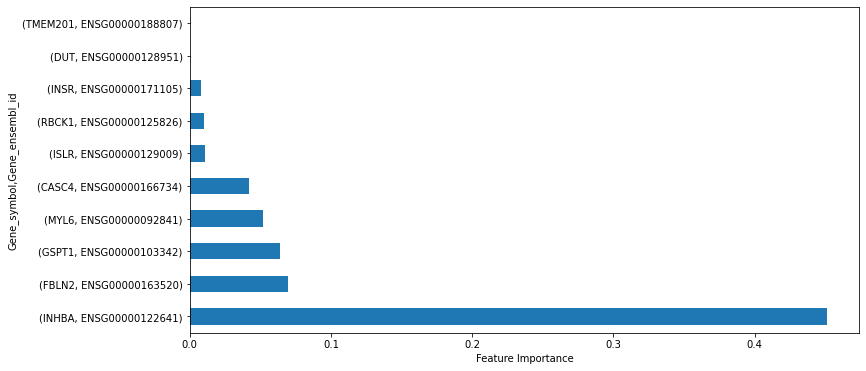

In [53]:
top_10_genes_iso = LR_model_features(X_develop_iso,y_develop_iso,best_params_iso,max_features=10)
top_10_genes_iso